In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/applicant.csv')
df2 = pd.read_csv('/content/loan.csv')

In [ ]:
df_final = df1.merge(df2,on='applicant_id',how='inner')
df_final.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [ ]:
df_final['high_risk_applicant'].value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

In [ ]:
num_cols = [col for col in df_final.columns if df_final[col].dtype!='object']

cat_cols = [col for col in df_final.columns if df_final[col].dtype=='object']

**TASK-1**

A) Univariate Analysis

<Figure size 1440x864 with 0 Axes>

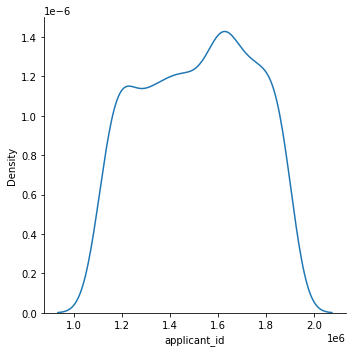

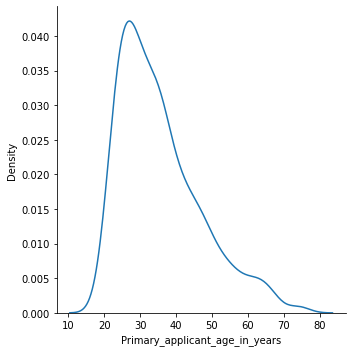

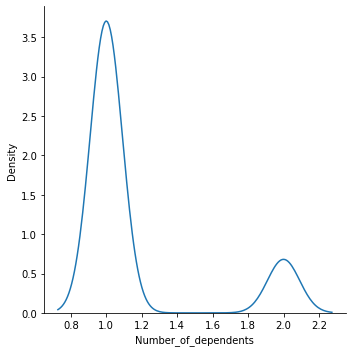

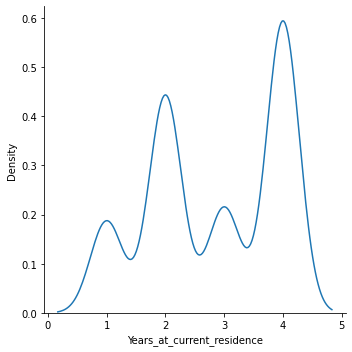

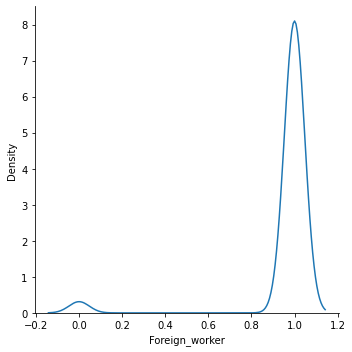

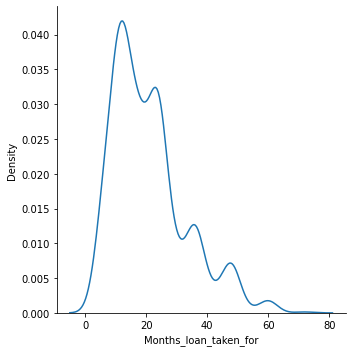

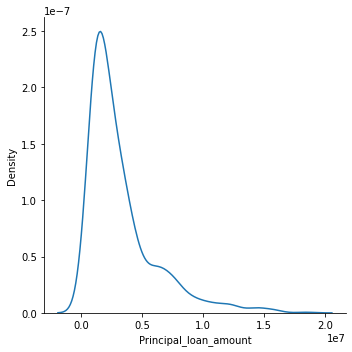

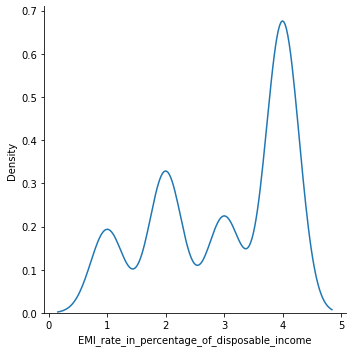

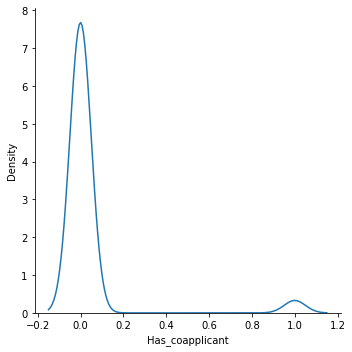

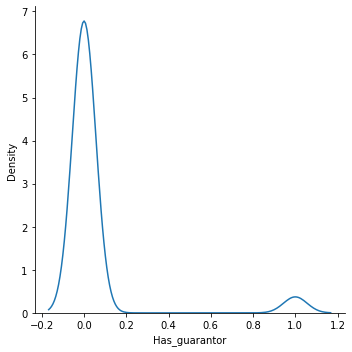

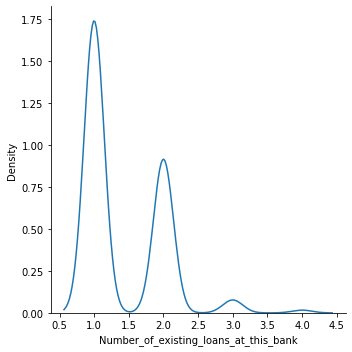

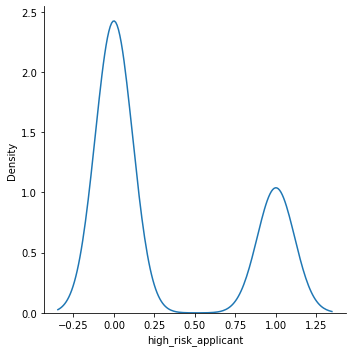

In [ ]:
# checking numerical features distribution
import seaborn as sns

plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for col in num_cols:
  sns.displot(df_final[col],kind='kde')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

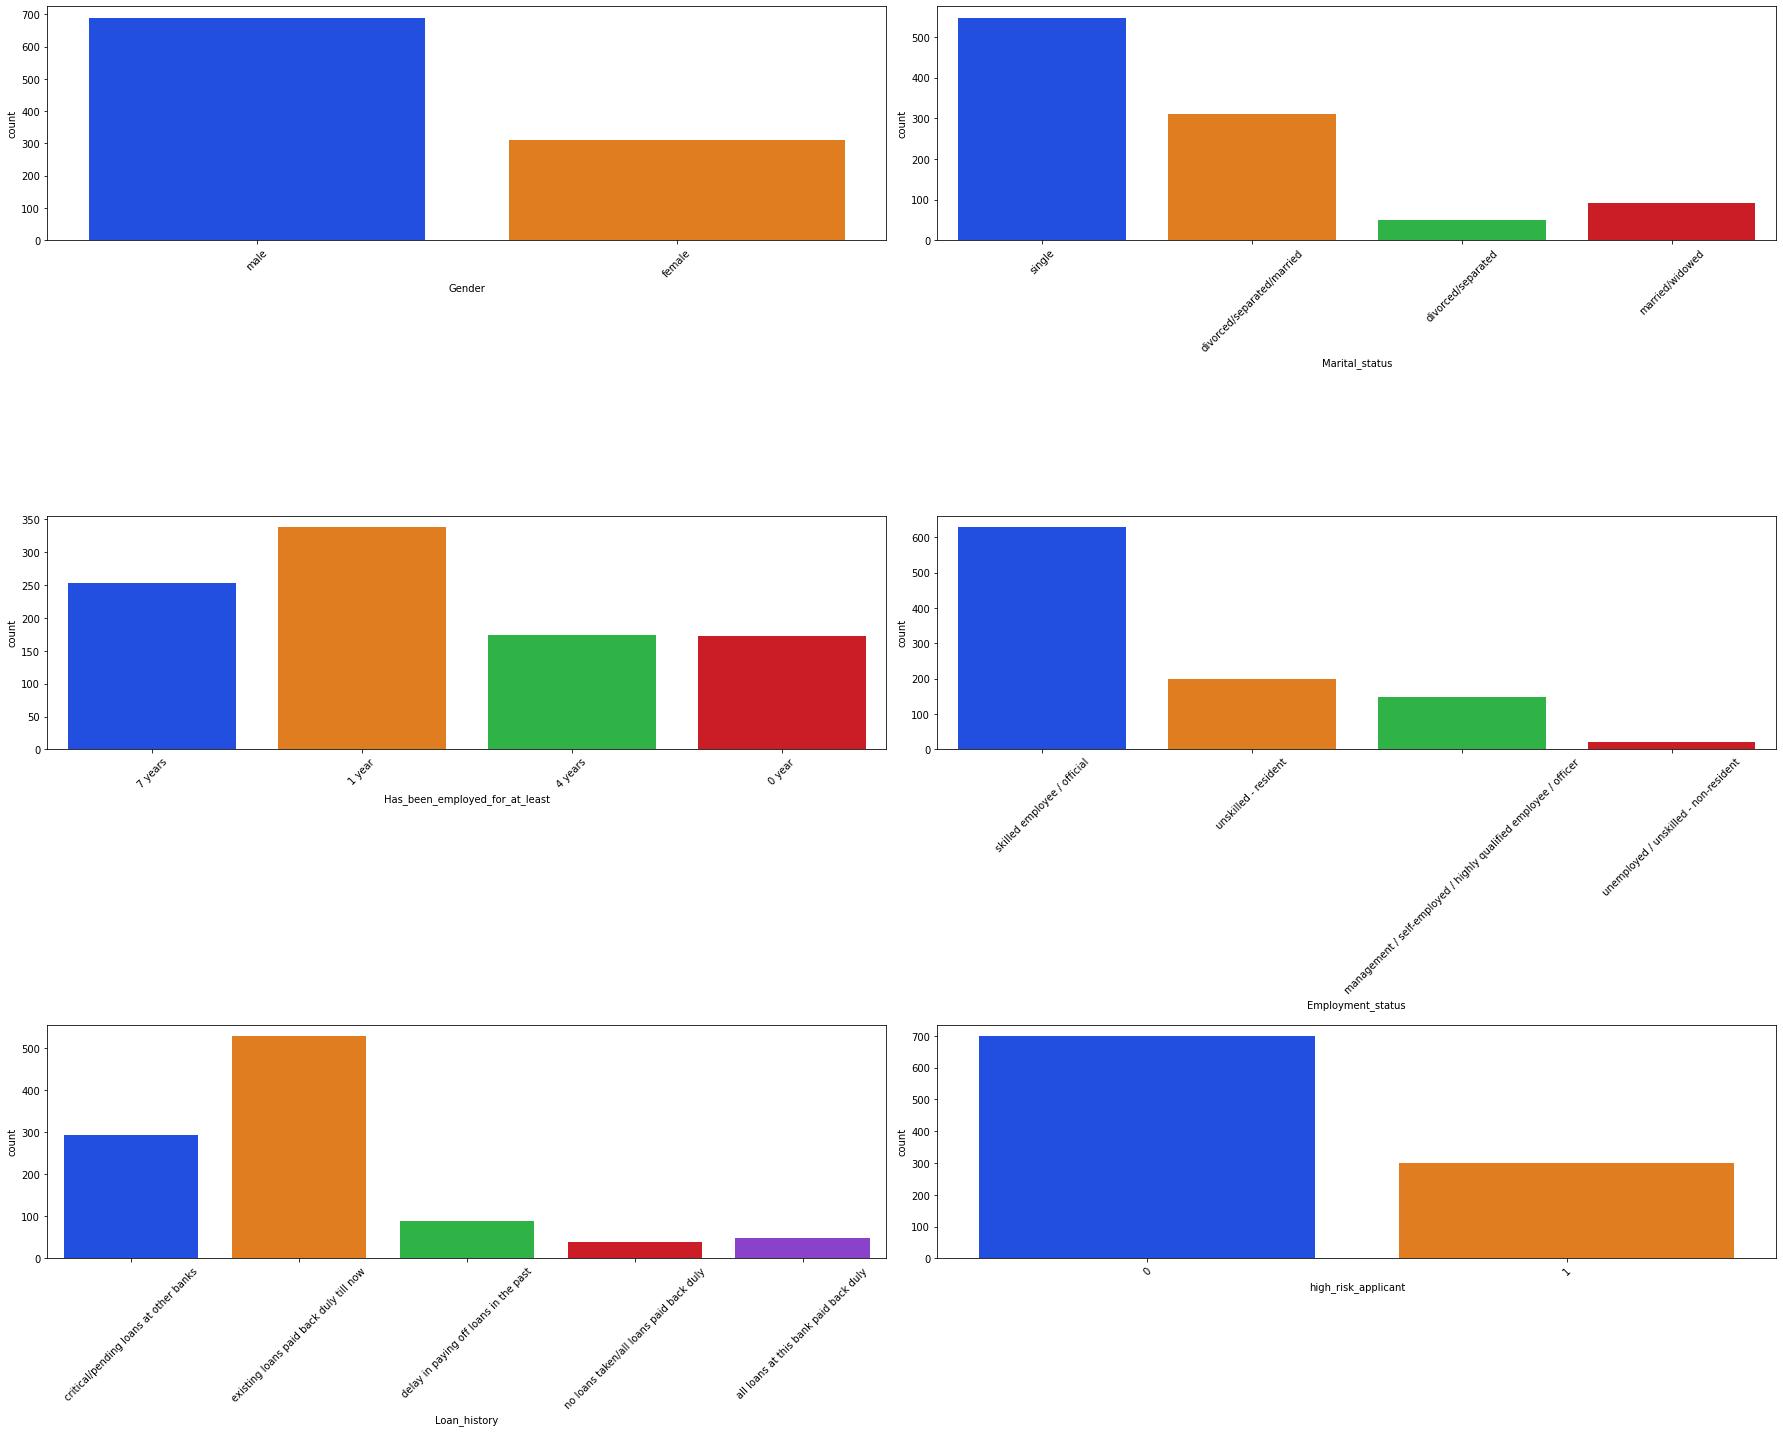

In [ ]:
#categorical features
cat_columns=['Gender', 'Marital_status','Has_been_employed_for_at_least','Employment_status','Loan_history','high_risk_applicant']
for i in cat_columns:
    plt.rcParams['figure.figsize']=(25,20)
    plt.subplot(3,2,cat_columns.index(i)+1)
    plt.xticks(rotation= 45)
    plt.tight_layout()
    sns.countplot(df_final[i],palette='bright')

**Insights:**

1.70% of applicants in the dataset are male.

2.Around 55% of the applicants in the dataset are single.

3.Around 34% of the applicants have been employed for atleast 1 year.

4.Around 65% of applicants in the dataset are skilled-employed/official.

5.More than 52% of applicants have good Loan_history(repaid their existing loans)

6.Around 70% of applicants have low credit risk(high chance of paying back).

**Ordinal Features**


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


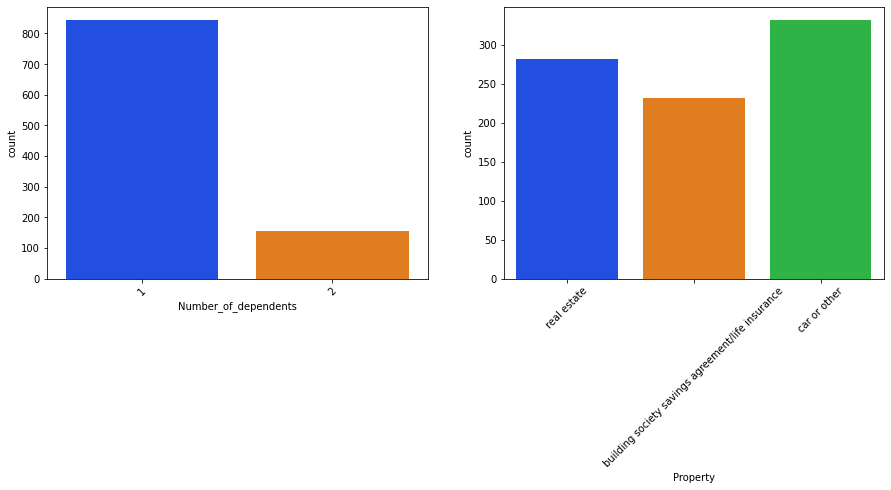

In [ ]:
# Ordinal Features
ord_columns=['Number_of_dependents','Property']
for i in ord_columns:
    plt.rcParams['figure.figsize']=(15,5)
    plt.subplot(1,2,ord_columns.index(i)+1)
    plt.xticks(rotation=45)
    sns.countplot(df_final[i],palette='bright')

Most of the applicants have 1 dependents.

In [ ]:
df_final.groupby('high_risk_applicant').mean()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank
high_risk_applicant,,,,,,,,,,,
0,1.519121e+06,36.224286,1.155714,2.842857,0.952857,19.207143,2.985457e+06,2.920000,0.032857,0.060000,1.424286
1,1.504595e+06,33.963333,1.153333,2.850000,0.986667,24.860000,3.938127e+06,3.096667,0.060000,0.033333,1.366667


Less loan amount have little high chance of paying back.

**Categoric Features vs Target Feature**

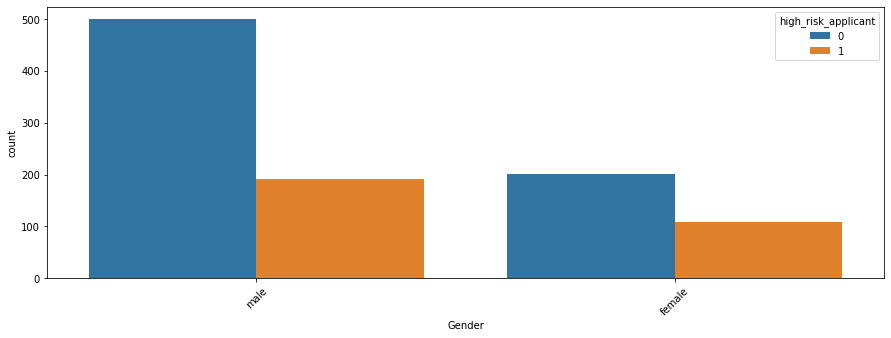

In [ ]:
plt.xticks(rotation=45)
sns.countplot(x='Gender',hue='high_risk_applicant',data=df_final)

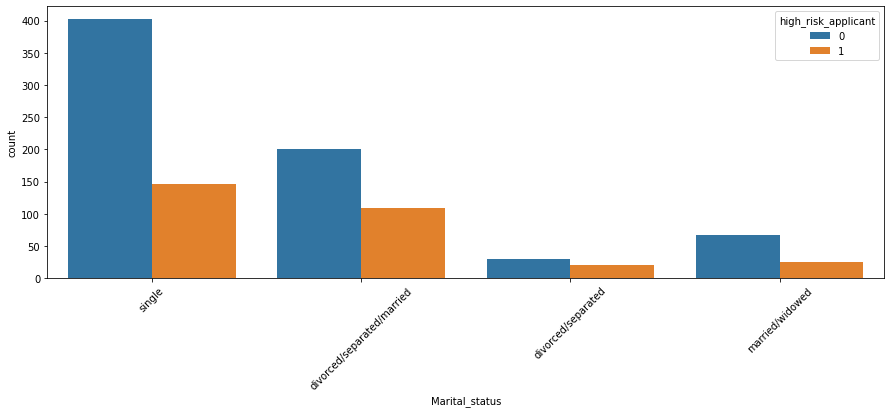

In [ ]:
plt.xticks(rotation=45)
sns.countplot(x='Marital_status',hue='high_risk_applicant',data=df_final)

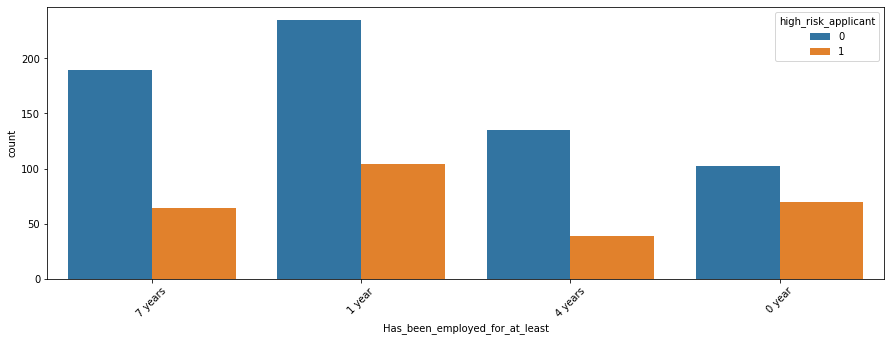

In [ ]:
plt.xticks(rotation=45)
sns.countplot(x='Has_been_employed_for_at_least',hue='high_risk_applicant',data=df_final)

1.Low credit risk for male is 30% more than female applicants.
2. Married applicants & single applicants have higher chance of low credit risk than divorced/separated.
3.Those with experience have higher chance of low risk than Unemployed.


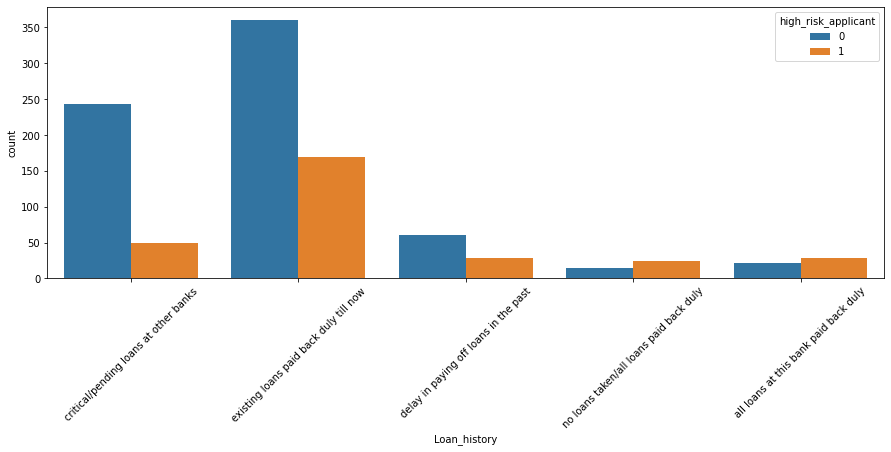

In [ ]:
plt.xticks(rotation=45)
sns.countplot(x='Loan_history',hue='high_risk_applicant',data=df_final)

Good Credit History(Loan history) applicants has very high chance of loan paying back. Also , age between 22-50 has high chance of paying back Loan

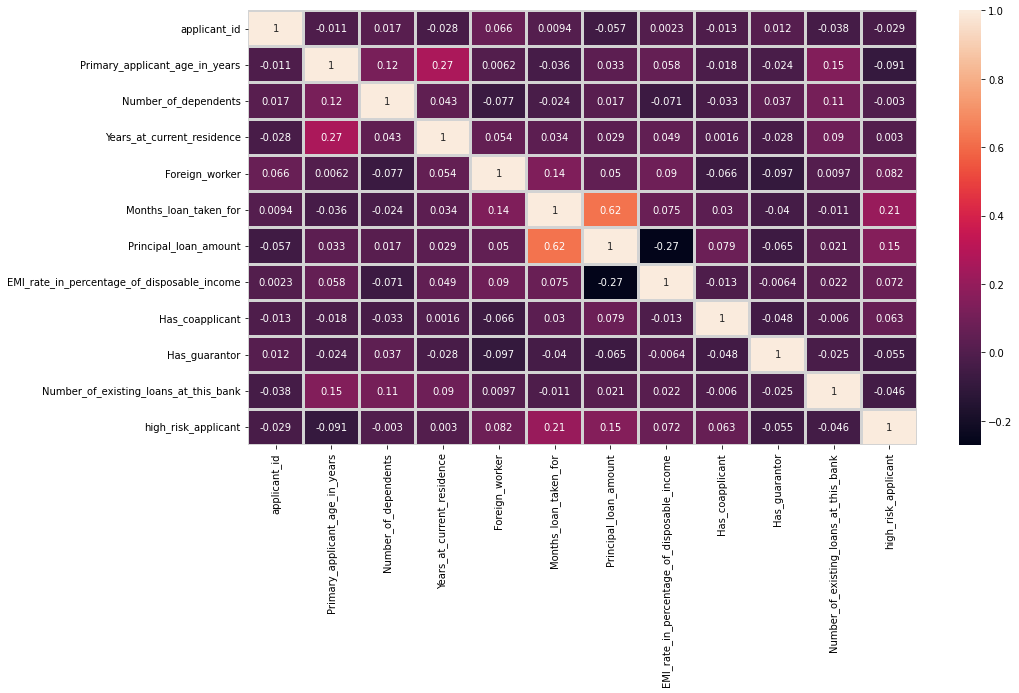

In [ ]:
# correlated heatmap of data

plt.figure(figsize = (15, 8))


sns.heatmap(df_final.corr(),annot=True,linewidth=2,linecolor='lightgrey')
plt.savefig('corr.jpg')

In [ ]:
# let's check count of null values in whole df

df_final.isnull().sum().sort_values(ascending=False)

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Months_loan_taken_for                                         0
Loan_history                                                  0
Number_of_existing_loans_at_this_bank                         0
Has_guarantor                                                 0
Has_coapplicant                                               0
EMI_rate_in_percentage_of_disposable_income                   0
Principal_loan_amount                   

In [ ]:
# let's check count of null values in num_cols

df_final[num_cols].isnull().sum().sort_values(ascending=False)

applicant_id                                   0
Primary_applicant_age_in_years                 0
Number_of_dependents                           0
Years_at_current_residence                     0
Foreign_worker                                 0
Months_loan_taken_for                          0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
high_risk_applicant                            0
dtype: int64

In [ ]:
# let's check count of null values in cat cols

df_final[cat_cols].isnull().sum().sort_values(ascending=False)

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Gender                                                        0
Marital_status                                                0
Housing                                                       0
Employment_status                                             0
loan_application_id                                           0
Loan_history                                                  0
dtype: int64

In [ ]:
# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = df_final[feature].mode()[0]
    df_final[feature] = df_final[feature].fillna(mode)

In [ ]:
# filling null valuesfor  cat_cols using mode imputation
for col in cat_cols:
  impute_mode(col)

In [ ]:
# let's check count of null values in cat_cols again

df_final[cat_cols].isnull().sum().sort_values(ascending=False)

Gender                                                      0
Marital_status                                              0
Housing                                                     0
Employment_status                                           0
Has_been_employed_for_at_least                              0
Has_been_employed_for_at_most                               0
Telephone                                                   0
Savings_account_balance                                     0
Balance_in_existing_bank_account_(lower_limit_of_bucket)    0
Balance_in_existing_bank_account_(upper_limit_of_bucket)    0
loan_application_id                                         0
Purpose                                                     0
Property                                                    0
Other_EMI_plans                                             0
Loan_history                                                0
dtype: int64

In [ ]:
df_final[cat_cols].columns

Index(['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Purpose', 'Property', 'Other_EMI_plans',
       'Loan_history'],
      dtype='object')

In [ ]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[0:]:
    df_final[col] = le.fit_transform(df_final[col])

In [ ]:
df_final.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,1,3,1,1,4,1,3,2,...,5,1169000,4,2,0,0,0,2,1,0
1,1203873,22,0,1,1,1,2,1,1,2,...,5,5951000,2,2,0,0,0,1,3,1
2,1432761,49,1,3,2,1,3,3,2,3,...,4,2096000,2,2,0,0,0,1,1,0
3,1207582,45,1,3,2,0,4,1,2,3,...,0,7882000,2,0,0,1,0,1,3,0
4,1674436,53,1,3,2,0,4,1,1,2,...,6,4870000,3,1,0,0,0,2,2,1


In [ ]:
X = df_final.drop('high_risk_applicant',axis=1)
y = df_final['high_risk_applicant']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=13)
X_new = selector.fit_transform(X, y)
X_new.shape

(1000, 13)

In [ ]:
print(selector.get_support())


[ True  True False  True False False False False  True  True False False
 False False False  True  True  True  True False  True  True  True False
 False  True]


In [ ]:
df_final.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [ ]:
# import required libraries RFE, LogisticRegression and dependencies

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialise model variable with LogisticRegression function with solver = 'liblinear'
model = LogisticRegression(solver='liblinear')
 
# rfe variable has RFE instance with should have model and n_features_to_select=4 as parameters
rfe = RFE(model,n_features_to_select=13)

In [ ]:
# fit rfe with X and Y
fit = rfe.fit(X,y)

In [ ]:
# print fit.n_features_, fit.support_, fit.ranking_

print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

13
[ True  True False  True False False  True False  True  True False False
 False False False  True  True  True  True  True  True False False False
  True False]
[ 1  1  5  1  4  8  1  2  1  1 14  9  3 10  7  1  1  1  1  1  1 13 11 12
  1  6]


In [ ]:
df_final.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')